# Hello I am man who wrote this code
You can see many steps of code

First import some library

Second load data from csv file

Third cleaning the mess of dataset from load_dataset

# If you want, you can continue my presentasion

# Good luck !!!

In [18]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset():
    df = pd.read_csv("googleplaystore.csv")
    return df
data = load_dataset()



def print_summarize_dataset(dataset):
    print(dataset.shape)
    print(dataset.head(10))
    print(dataset.describe())

# print_summerize_data(data)
def clean_dataset(data):
    data.dropna(axis=0, inplace=True)
    data["Reviews"] = data["Reviews"].astype(np.int)
    data["Category"] = data["Category"].astype("string")
    data["Installs"] = data["Installs"].str.replace("+", '').str.replace(",", '').astype(int)
    data["Price"] = data["Price"].str.replace("$", '').astype(np.float)
    data["Last Updated"] = pd.to_datetime(data['Last Updated'])
    data["Genres"] = data["Genres"].str.replace("&", "and").astype("string")
    data["Size"] = data["Size"].str.replace("Varies with device", "NaN")
    data_size = data[data["Size"].str.contains("k", regex=False)]
    data_size["Size"] = data_size["Size"].str.replace("k", '').astype(float)/1000
    data["Size"].update(data_size["Size"])
    data['Size'] = data["Size"].str.replace("M", '').astype(float)
    data["Size"] = data["Size"].fillna(np.mean(data["Size"]))
    data["Content Rating"] = data["Content Rating"].str.replace("+", "")
    return data
clean_dataset = clean_dataset(data)
clean_dataset

C:\Users\Komol\AppData\Local\Temp\ipykernel_6372\2627402998.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data["Reviews"] = data["Reviews"].astype(np.int)
C:\Users\Komol\AppData\Local\Temp\ipykernel_6372\2627402998.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art and Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art and Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art and Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art and Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0.0,Everyone,Art and Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,23.746317,1000,Free,0.0,Mature 17,Books and Reference,2015-01-19,Varies with device,Varies with device


<Figure size 2000x1500 with 0 Axes>

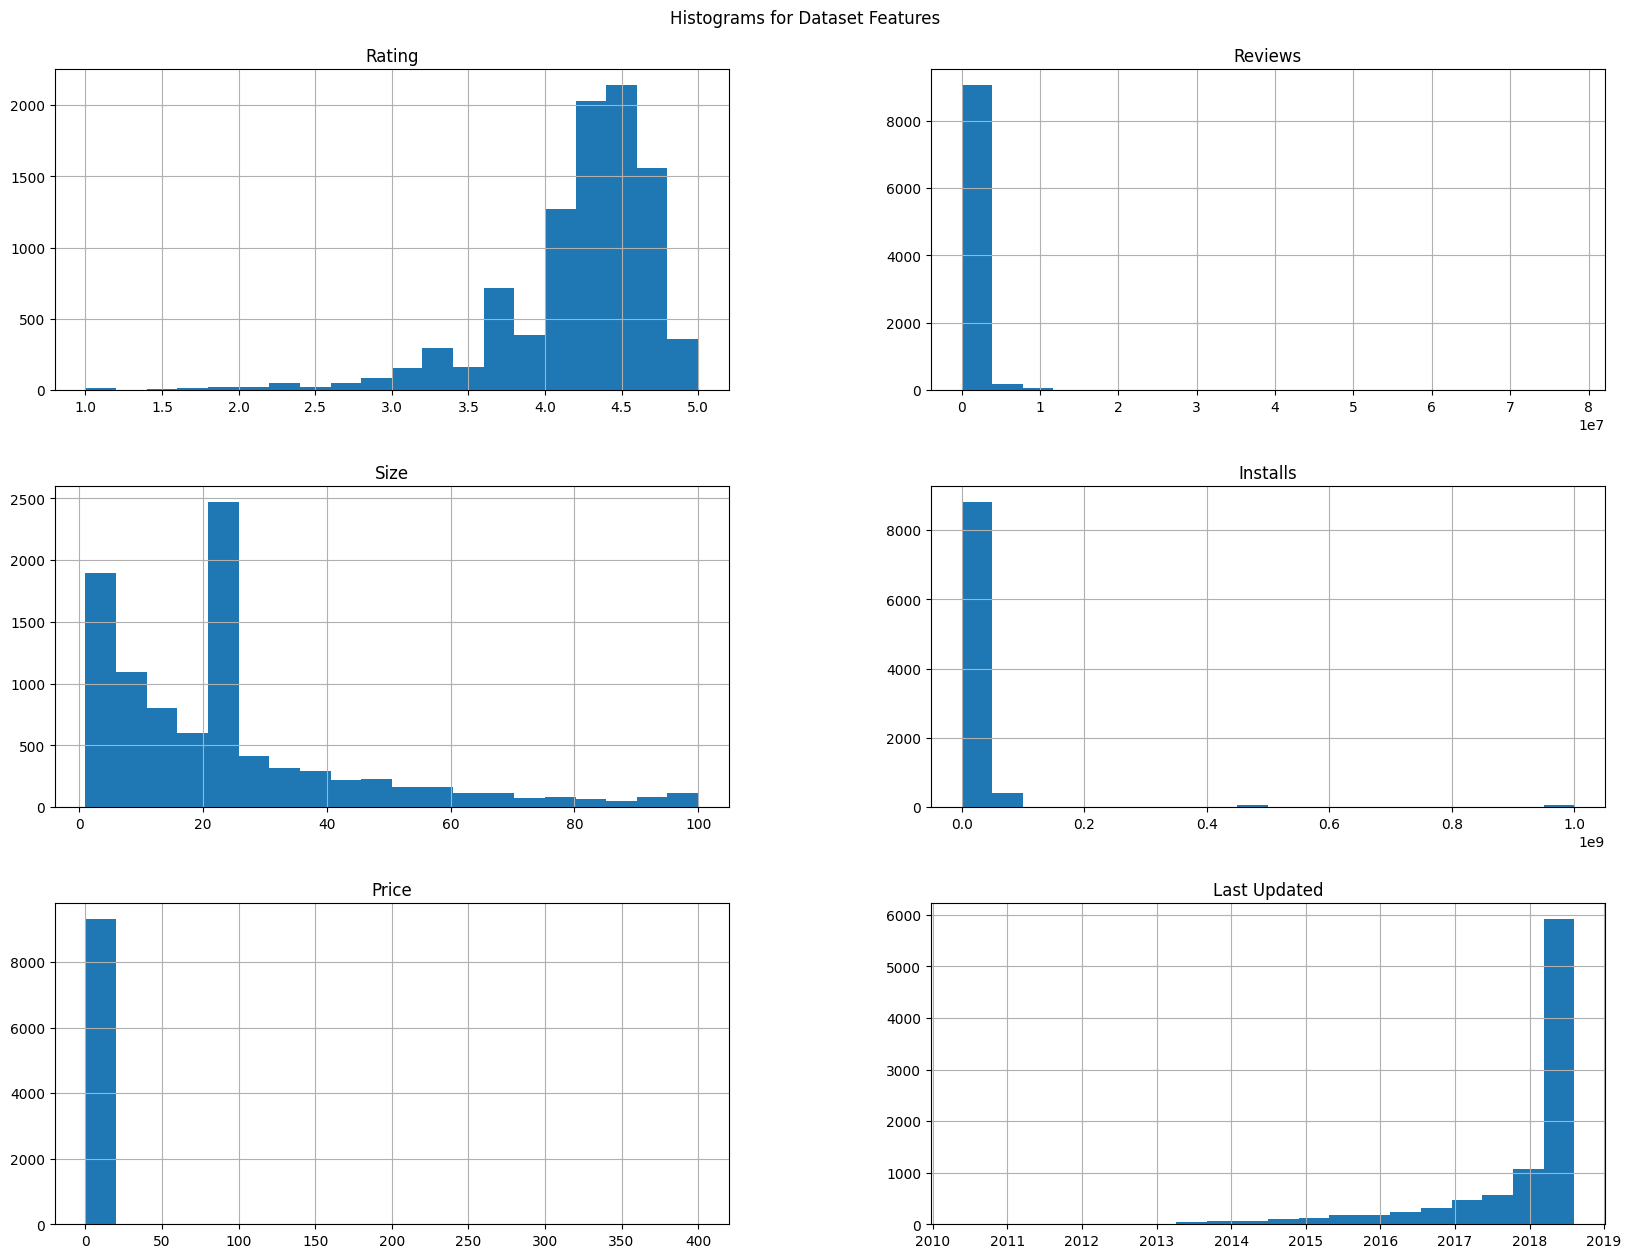

In [13]:
def print_histograms(dataset):
    plt.figure(figsize=(20, 15))
    dataset.hist(figsize=(20, 15), bins=20)
    plt.suptitle("Histograms for Dataset Features", y=0.92)
    plt.show()

print_histograms(clean_dataset)

# Ohh This is so amazing !!!

# I mean about bar diagram

# Plot with bar diagram the most populars paid apps of Family category

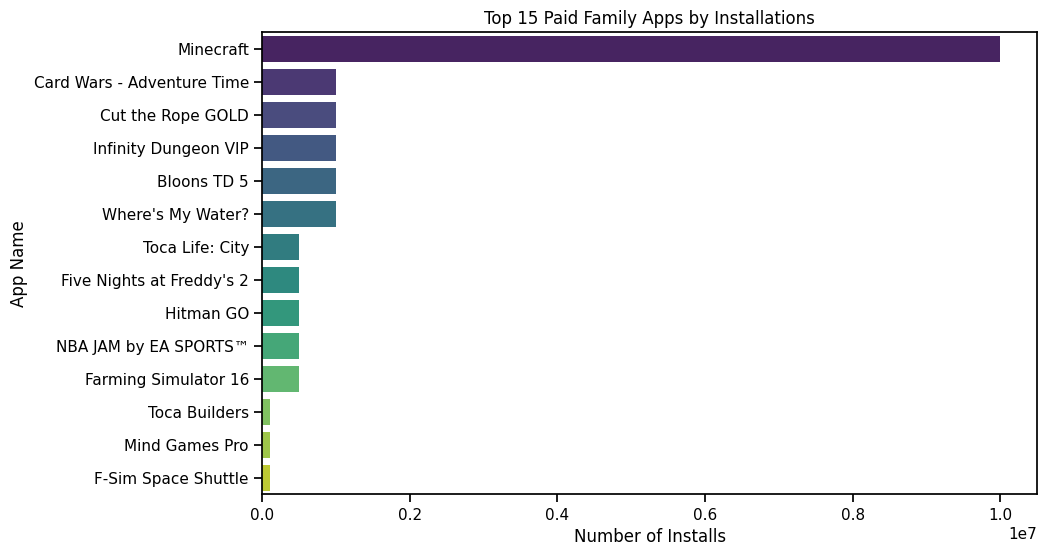

In [20]:
def most_populars_paid_apps_of_Family(clean_dataset):
    top_paid_family_apps = clean_dataset[(clean_dataset["Category"] == "FAMILY") & (clean_dataset["Type"] == "Paid")].nlargest(15, 'Installs')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Installs', y='App', data=top_paid_family_apps, palette='viridis')
    plt.title("Top 15 Paid Family Apps by Installations")
    plt.xlabel("Number of Installs")
    plt.ylabel("App Name")
    plt.show()
most_populars_paid_apps_of_Family(clean_dataset)

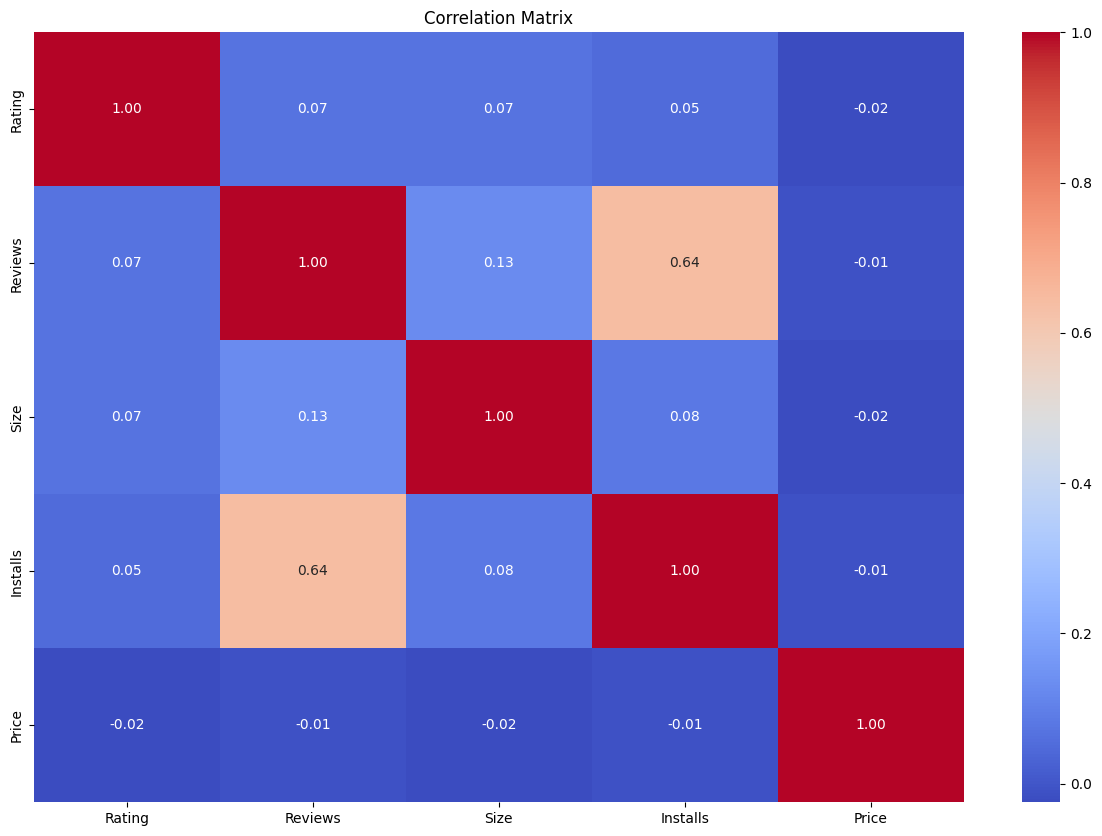

In [15]:
def compute_correlations_matrix(dataset):
    # Convert string values to numerical values for correlation matrix
    numerical_columns = dataset.select_dtypes(include=[np.number])
    plt.figure(figsize=(15, 10))
    sns.heatmap(numerical_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()
    
compute_correlations_matrix(clean_dataset)

# Plot with a pie diagram the most popular genres according to the number of installations from paid family

Maybe you can see some code in pie diagram
In this diagram can show you most popular genres


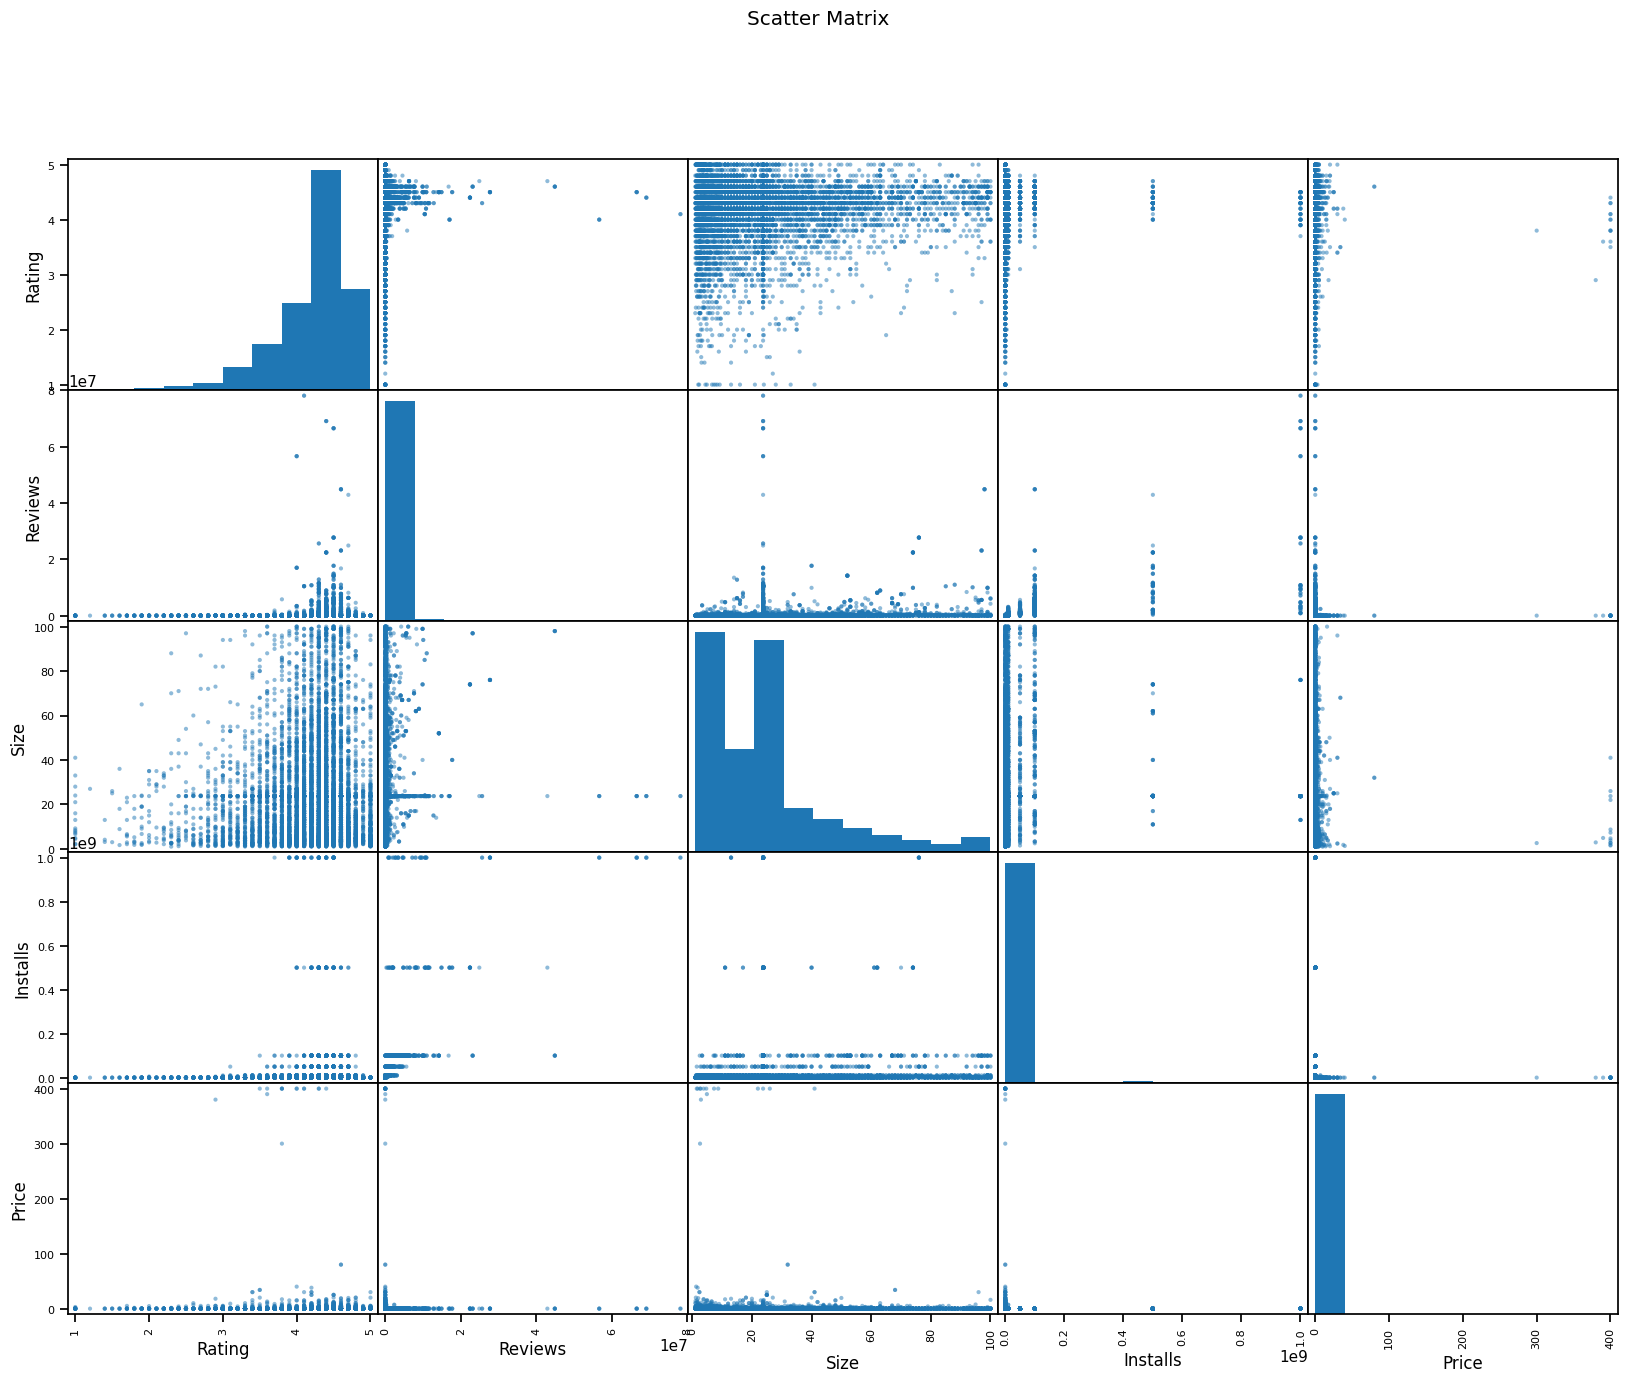

In [19]:
def print_scatter_matrix(dataset):
    scatter_matrix(dataset, figsize=(20, 15))
    plt.suptitle("Scatter Matrix")
    plt.show()

print_scatter_matrix(clean_dataset)

<ipython-input-4-ec3212e60541>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  genres  = clean_dataset.sort_values(by="Installs", ascending=False)[(clean_dataset["Category"]=="FAMILY")&(clean_dataset["Type"]=="Paid")][["Genres", "Installs"]]


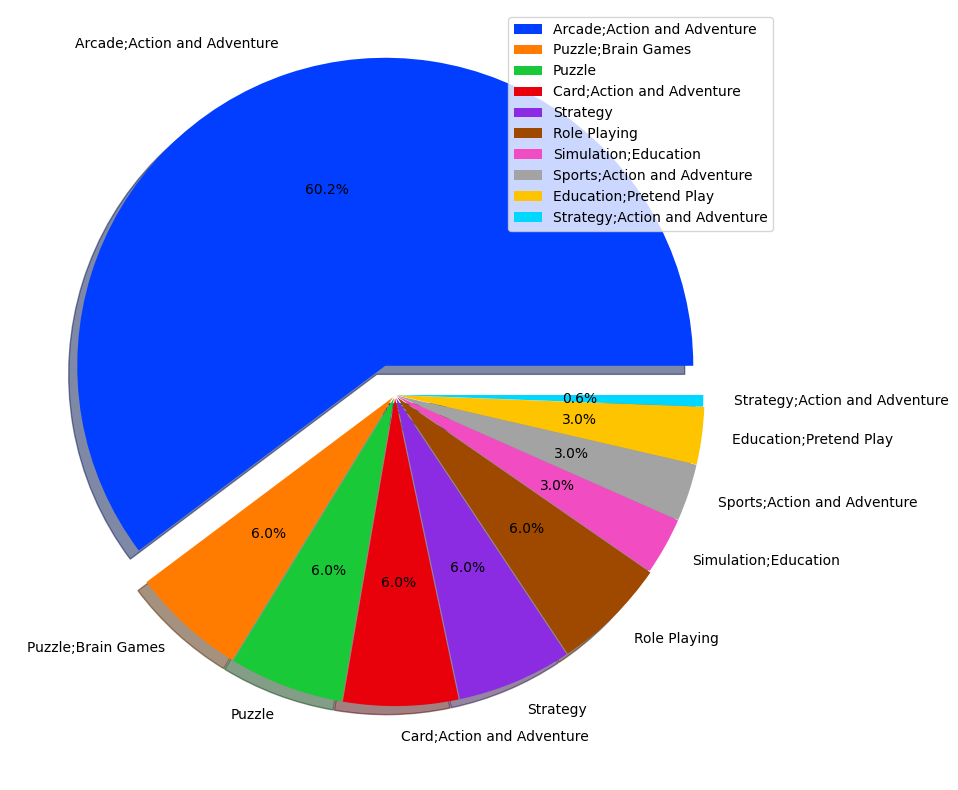

In [4]:
from os import name
def most_popular_genres_according(clean_dataset):
  genres  = clean_dataset.sort_values(by="Installs", ascending=False)[(clean_dataset["Category"]=="FAMILY")&(clean_dataset["Type"]=="Paid")][["Genres", "Installs"]]
  del_dup = genres.drop_duplicates("Genres", keep="first")
  data = list(zip(del_dup["Genres"], del_dup["Installs"]))
  labels = [i for i, j in data[:10]]
  X = [j for i, j in data[:10]]
  color = sns.color_palette("bright")
  explode = [i/100000000 for i in X]
  plt.figure(figsize=(30, 10))
  plt.pie(X, labels=labels, autopct='%1.1f%%', colors=color, shadow=True, explode=explode)
  plt.legend(loc='upper right')
most_popular_genres_according(clean_dataset)

#An array with the number of installation per category

Maybe I change this rules and I add some plots

This code find per of category

And after this find Installs of given data

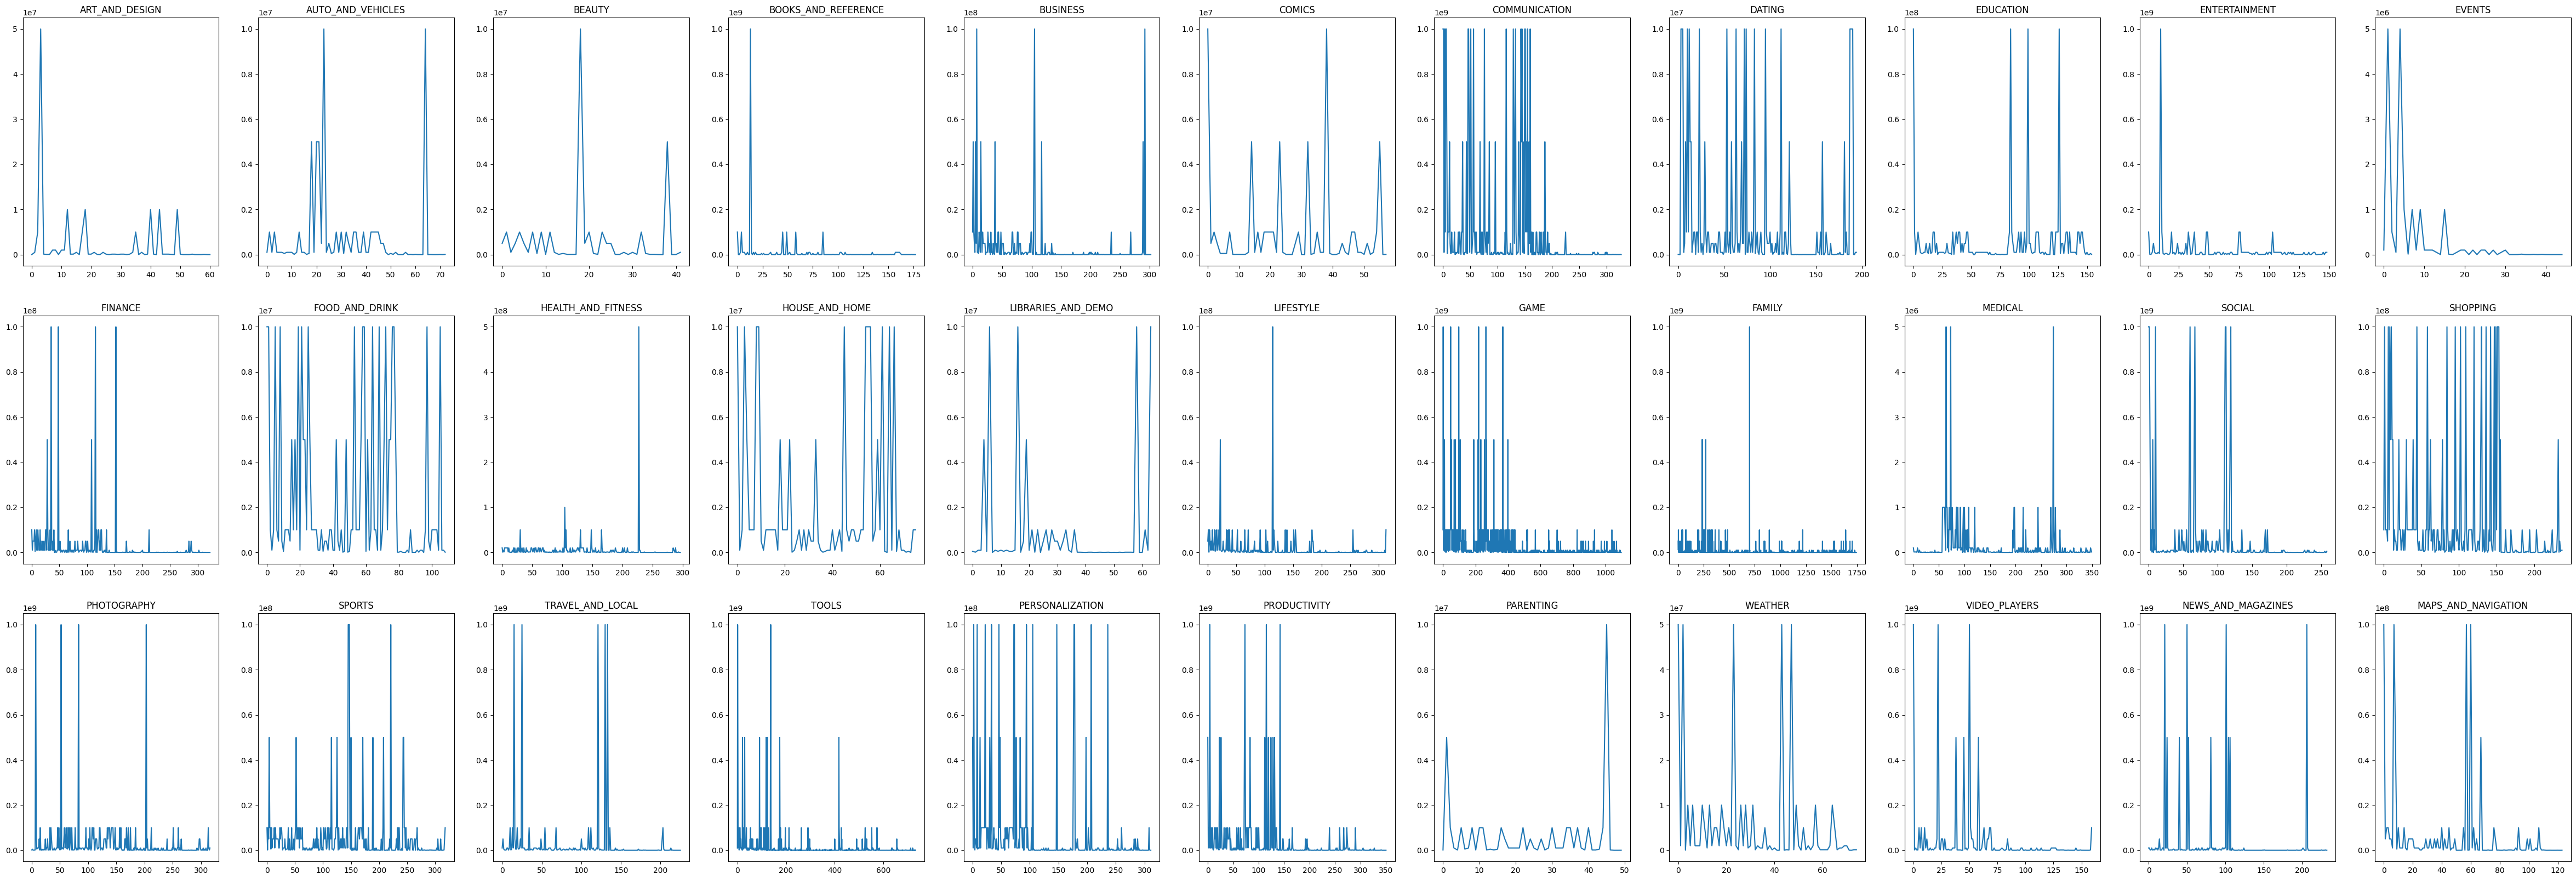

In [5]:
def number_of_installation_per_cat(clean_dataset):
  data = clean_dataset["Category"].unique()
  all = []
  col = []
  for i in data:
    values = clean_dataset[clean_dataset["Category"]==i]["Installs"].values
    all.append(values)
    col.append(i)

  # you can take any key of Category
  plt.figure(figsize=(60, 20))
  for i in range(len(all)):
    plt.subplot(3, 11, i+1)
    plt.plot(all[i])
    plt.title(col[i])
  plt.show()
  # return dict(zip(col, all))["MAPS_AND_NAVIGATION"]
number_of_installation_per_cat(clean_dataset)

# Plot a pie with the number of installation per category

This code can plot a pie all numbers of each of category column

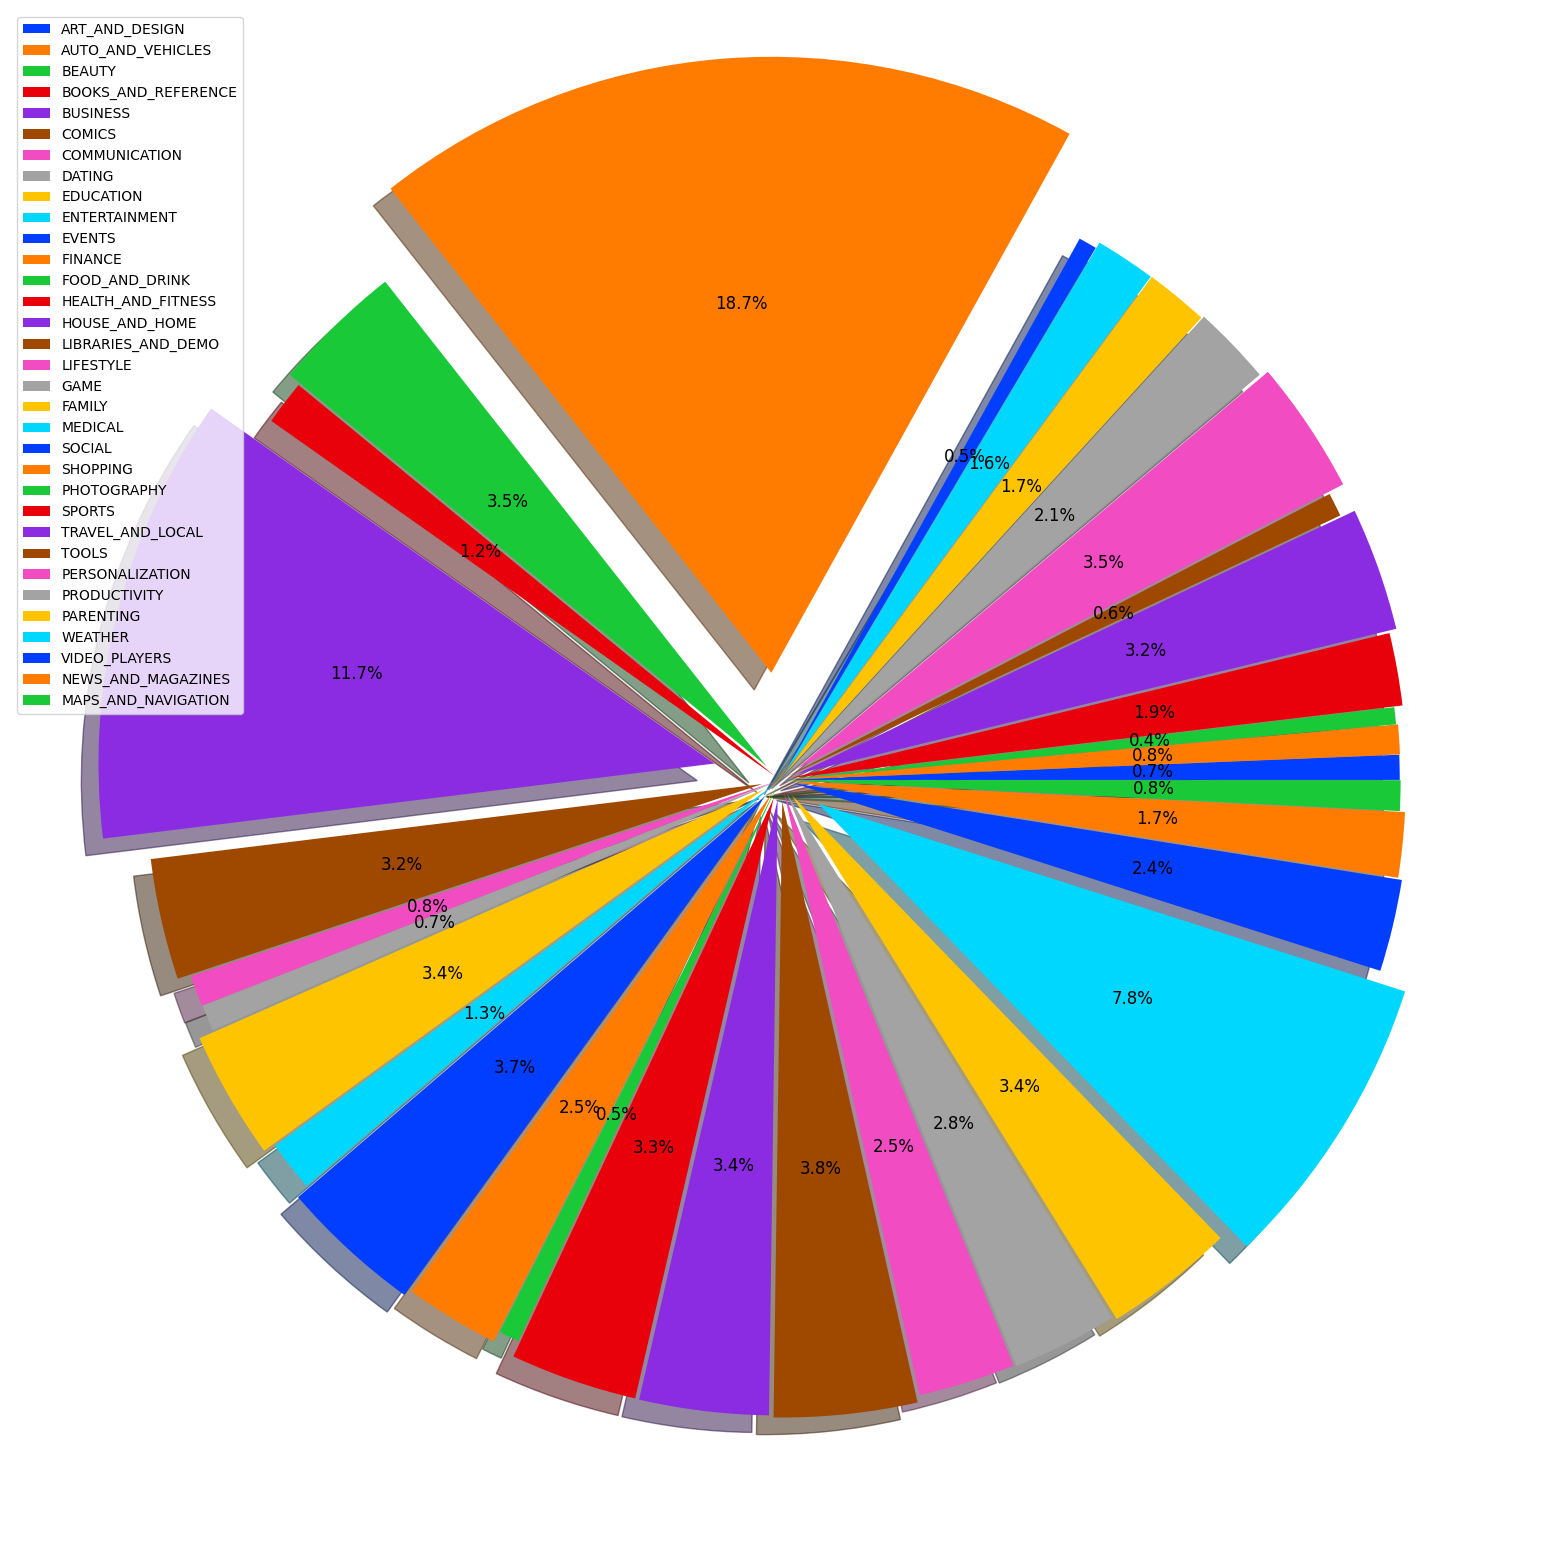

In [6]:

def pie_installs(clean_dataset):
  plt.figure(figsize=(50, 20))
  col = clean_dataset.Category.unique()
  color = sns.color_palette("bright")
  data = clean_dataset.groupby("Category").count()
  explode = [i/10000 for i in data["Installs"]]
  plt.pie(data["Installs"], autopct="%1.1f%%", colors=color, explode=explode, shadow=True, textprops={"fontsize":12})
  plt.legend(col)
pie_installs(clean_dataset)

# Plot a bar with the mean price per category

This code make a some math

Why? Because in this code used mean

To find from per category  mean of price


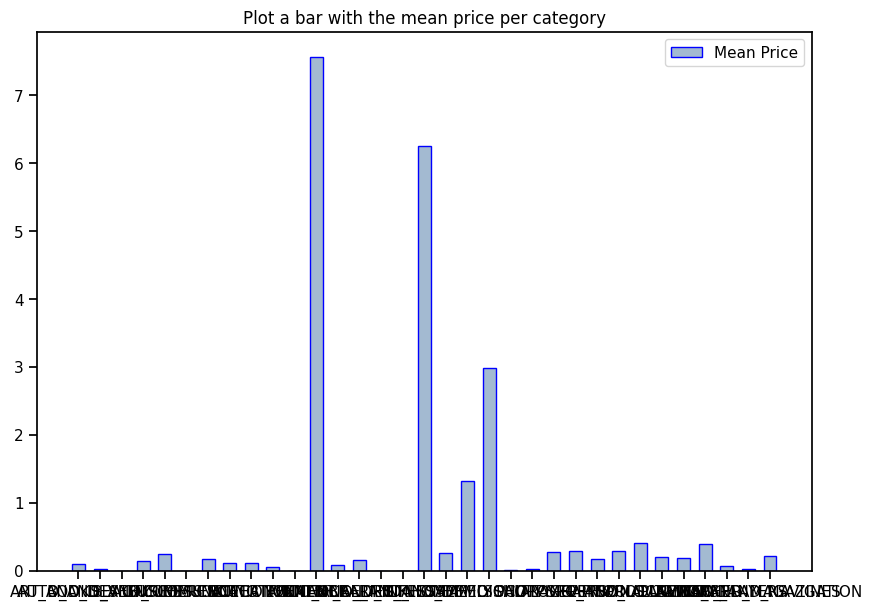

In [23]:
def mean_price_per_category(clean_dataset):
    col = clean_dataset["Category"].unique()
    var = [np.mean(clean_dataset[clean_dataset["Category"]==i]["Price"].values) for i in col]
    plt.figure(figsize=(10, 7))
    x_axis = np.arange(len(var))
    plt.bar(col, var, width=0.6, edgecolor='blue', color=(0.6, 0.7, 0.8, 0.9), label="Mean Price")
    plt.title("Plot a bar with the mean price per category")
    plt.legend()
    plt.show()
mean_price_per_category(clean_dataset)

# Most expensive price per category

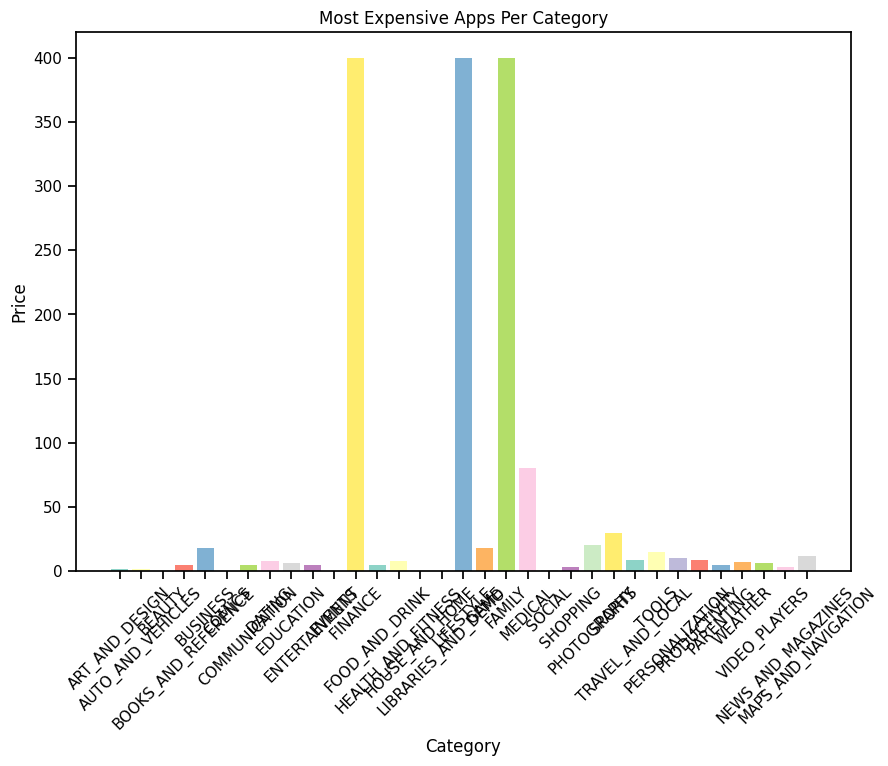

In [33]:
def expensive_price_per_category(clean_dataset):

    categories = clean_dataset["Category"].unique()
    max_prices = []

    for category in categories:
        prices = clean_dataset[(clean_dataset["Type"] == "Paid") & (clean_dataset["Category"] == category)]["Price"]

        if len(prices) > 0:
            max_prices.append(np.max(prices))

        else:
            max_prices.append(0)

    plt.figure(figsize=(10, 7))
    plt.bar(categories, max_prices, color=sns.color_palette("Set3", len(categories)))
    plt.title("Most Expensive Apps Per Category")
    plt.xlabel("Category")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()


expensive_price_per_category(clean_dataset)


# And that's all Thank you for your attention